https://www.kaggle.com/code/adachowicz/house-prices-random-forest-regression-analysis/notebook

All Notebooks : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code


Good Notebook : https://www.kaggle.com/code/dheemanthbhat/house-prices-adv-reg-competition-part-1-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
from sklearn.ensemble import RandomForestClassifier

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

Kaggle Competition: House Price Regression
For this competiton, we are given a data set of 1,460 homes, each with a few dozen features of types: float, integer, and categorical. We are tasked with building a regression model to estimate a home's sale price. Since this is my first kaggle competition, and I'm still quite new to machine learning techniques, I'm going to use this problem as a way to explore common classifiers, namely:

random trees and
random forests.

> Total 81 columns

In [4]:
data = pd.read_csv(r'Regression_RandomForest/train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [111]:
data.shape

(1460, 81)

In [112]:
X_test = pd.read_csv(r'Regression_RandomForest/test.csv')
X_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [113]:
X_test.shape

(1459, 80)

In [114]:
y_test = pd.read_csv(r'Regression_RandomForest/sample_submission.csv')
y_test.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [115]:
y_test.shape

(1459, 2)

In [116]:
data.shape

(1460, 81)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [118]:
data.shape

(1460, 81)

In [119]:
X_test.shape

(1459, 80)

In [120]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [121]:
X_test.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [122]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

##### Total null values

In [123]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [125]:
(X_test.isnull().sum()/X_test.shape[0]*100).sort_values(ascending=False).head(10)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
dtype: float64

In [126]:
y_test.isnull().sum()

Id           0
SalePrice    0
dtype: int64

#### Observation for null values:
> PoolQC, MiscFeature, Alley have more than 90% values as NaN

> Fence column has 80% missing data

> FireplaceQu has more than 50% missing value

In [127]:
data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [128]:
data[data['PoolQC'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [129]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [130]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [131]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [132]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Dropping columns with more than 50% null values

In [133]:
data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)

In [134]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [137]:
data.shape

(1460, 76)

In [138]:
X_test.shape

(1459, 80)

In [139]:
X_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)
X_test.shape

(1459, 75)

In [140]:
X_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

#### Finding numerical and categorical columns

In [141]:
categorical_col = []
numerical_col = []

In [142]:
for i in data.columns:
    if data[i].dtype != ('int64' or 'float64'):
        print(i)
        categorical_col.append(i)
        display(data[i].value_counts())
        print(data[i].value_counts().sum())
        print('-------------------')
        
    else:
        print('+++++++++++++++++')
        print(i)
        numerical_col.append(i)
        display(data[i].value_counts())
        print(data[i].value_counts().sum())
        print('+++++++++++++++++')

+++++++++++++++++
Id


1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
MSSubClass


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

1460
+++++++++++++++++
MSZoning


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

1460
-------------------
LotFrontage


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

1201
-------------------
+++++++++++++++++
LotArea


7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

1460
+++++++++++++++++
Street


Pave    1454
Grvl       6
Name: Street, dtype: int64

1460
-------------------
LotShape


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

1460
-------------------
LandContour


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

1460
-------------------
Utilities


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

1460
-------------------
LotConfig


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

1460
-------------------
LandSlope


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

1460
-------------------
Neighborhood


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

1460
-------------------
Condition1


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

1460
-------------------
Condition2


Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

1460
-------------------
BldgType


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1460
-------------------
HouseStyle


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

1460
-------------------
+++++++++++++++++
OverallQual


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
OverallCond


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
YearBuilt


2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
YearRemodAdd


1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

1460
+++++++++++++++++
RoofStyle


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

1460
-------------------
RoofMatl


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

1460
-------------------
Exterior1st


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

1460
-------------------
Exterior2nd


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

1460
-------------------
MasVnrType


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

1452
-------------------
MasVnrArea


0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

1452
-------------------
ExterQual


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

1460
-------------------
ExterCond


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

1460
-------------------
Foundation


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

1460
-------------------
BsmtQual


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

1423
-------------------
BsmtCond


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

1423
-------------------
BsmtExposure


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

1422
-------------------
BsmtFinType1


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

1423
-------------------
+++++++++++++++++
BsmtFinSF1


0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

1460
+++++++++++++++++
BsmtFinType2


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

1422
-------------------
+++++++++++++++++
BsmtFinSF2


0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
BsmtUnfSF


0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
TotalBsmtSF


0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

1460
+++++++++++++++++
Heating


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

1460
-------------------
HeatingQC


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

1460
-------------------
CentralAir


Y    1365
N      95
Name: CentralAir, dtype: int64

1460
-------------------
Electrical


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

1459
-------------------
+++++++++++++++++
1stFlrSF


864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
2ndFlrSF


0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
LowQualFinSF


0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
GrLivArea


864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
BsmtFullBath


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
BsmtHalfBath


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
FullBath


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
HalfBath


0    913
1    535
2     12
Name: HalfBath, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
BedroomAbvGr


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
KitchenAbvGr


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

1460
+++++++++++++++++
KitchenQual


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

1460
-------------------
+++++++++++++++++
TotRmsAbvGrd


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

1460
+++++++++++++++++
Functional


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

1460
-------------------
+++++++++++++++++
Fireplaces


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

1460
+++++++++++++++++
GarageType


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

1379
-------------------
GarageYrBlt


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

1379
-------------------
GarageFinish


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

1379
-------------------
+++++++++++++++++
GarageCars


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
GarageArea


0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

1460
+++++++++++++++++
GarageQual


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

1379
-------------------
GarageCond


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

1379
-------------------
PavedDrive


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

1460
-------------------
+++++++++++++++++
WoodDeckSF


0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
OpenPorchSF


0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
EnclosedPorch


0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
3SsnPorch


0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
ScreenPorch


0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
PoolArea


0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
MiscVal


0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
MoSold


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

1460
+++++++++++++++++
+++++++++++++++++
YrSold


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

1460
+++++++++++++++++
SaleType


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

1460
-------------------
SaleCondition


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

1460
-------------------
+++++++++++++++++
SalePrice


140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

1460
+++++++++++++++++


In [143]:
categorical_col

['MSZoning',
 'LotFrontage',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [144]:
len(categorical_col)

41

In [145]:
numerical_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [37]:
len(numerical_col)

35

#### Observation:

- There are 41 categorical columns

- There are 35 numerical columns

### Calculating null values in all other columns which have not beeen dropped

In [38]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum(),"%.2f"%(data[i].isnull().sum()/data.shape[0]*100),"%   ------->",data[i].dtype)

LotFrontage 259 17.74 %   -------> float64
MasVnrType 8 0.55 %   -------> object
MasVnrArea 8 0.55 %   -------> float64
BsmtQual 37 2.53 %   -------> object
BsmtCond 37 2.53 %   -------> object
BsmtExposure 38 2.60 %   -------> object
BsmtFinType1 37 2.53 %   -------> object
BsmtFinType2 38 2.60 %   -------> object
Electrical 1 0.07 %   -------> object
GarageType 81 5.55 %   -------> object
GarageYrBlt 81 5.55 %   -------> float64
GarageFinish 81 5.55 %   -------> object
GarageQual 81 5.55 %   -------> object
GarageCond 81 5.55 %   -------> object


So, categorical columns with null values:

- MasVnrType 8 0.55 %   -------> object
- BsmtQual 37 2.53 %   -------> object
- BsmtCond 37 2.53 %   -------> object
- BsmtExposure 38 2.60 %   -------> object
- BsmtFinType1 37 2.53 %   -------> object
- BsmtFinType2 38 2.60 %   -------> object
- Electrical 1 0.07 %   -------> object
- GarageType 81 5.55 %   -------> object
- GarageFinish 81 5.55 %   -------> object
- GarageQual 81 5.55 %   -------> object
- GarageCond 81 5.55 %   -------> object

Numerical columns with null values:

- LotFrontage 259 17.74 %   -------> float64
- MasVnrArea 8 0.55 %   -------> float64
- GarageYrBlt 81 5.55 %   -------> float64

In [39]:
data.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
dtype: int64

In [40]:
data.isnull().sum().sum()/data.shape[0]*100

59.45205479452055

#### Count of 0 values in a column

In [41]:
for column_name in data.columns:
    column = data[column_name]
    
    count = (column == 0).sum()
    if count > 0:
        print("count of zeroes in ",column_name,'is :', count,"----> which is %.2f"%(count/data.shape[0]*100),'%')

count of zeroes in  MasVnrArea is : 861 ----> which is 58.97 %
count of zeroes in  BsmtFinSF1 is : 467 ----> which is 31.99 %
count of zeroes in  BsmtFinSF2 is : 1293 ----> which is 88.56 %
count of zeroes in  BsmtUnfSF is : 118 ----> which is 8.08 %
count of zeroes in  TotalBsmtSF is : 37 ----> which is 2.53 %
count of zeroes in  2ndFlrSF is : 829 ----> which is 56.78 %
count of zeroes in  LowQualFinSF is : 1434 ----> which is 98.22 %
count of zeroes in  BsmtFullBath is : 856 ----> which is 58.63 %
count of zeroes in  BsmtHalfBath is : 1378 ----> which is 94.38 %
count of zeroes in  FullBath is : 9 ----> which is 0.62 %
count of zeroes in  HalfBath is : 913 ----> which is 62.53 %
count of zeroes in  BedroomAbvGr is : 6 ----> which is 0.41 %
count of zeroes in  KitchenAbvGr is : 1 ----> which is 0.07 %
count of zeroes in  Fireplaces is : 690 ----> which is 47.26 %
count of zeroes in  GarageCars is : 81 ----> which is 5.55 %
count of zeroes in  GarageArea is : 81 ----> which is 5.55 %
c

In [42]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

##### difference of rows after dropping null rows

In [43]:
data.shape

(1460, 76)

In [44]:
new_df = data.dropna(axis='rows')
new_df.shape

(1094, 76)

In [45]:
# 366 columns were dropped
print(data.shape[0] - new_df.shape[0])
print("%.2f"%((data.shape[0] - new_df.shape[0])/data.shape[0]*100),"%")

366
25.07 %


___

<AxesSubplot:ylabel='Density'>

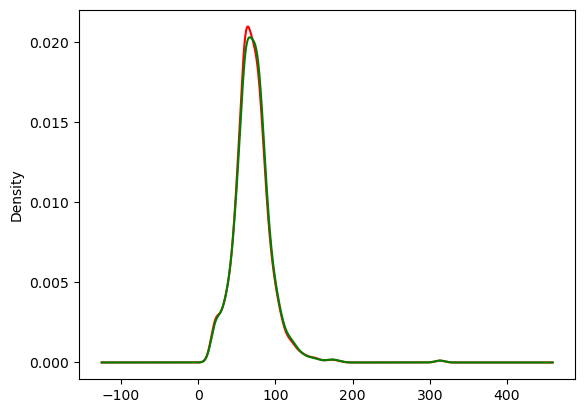

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['LotFrontage'].plot.density(color='red')

# data after cca
new_df['LotFrontage'].plot.density(color='green')


######## LotFrontage is good to go

<AxesSubplot:ylabel='Density'>

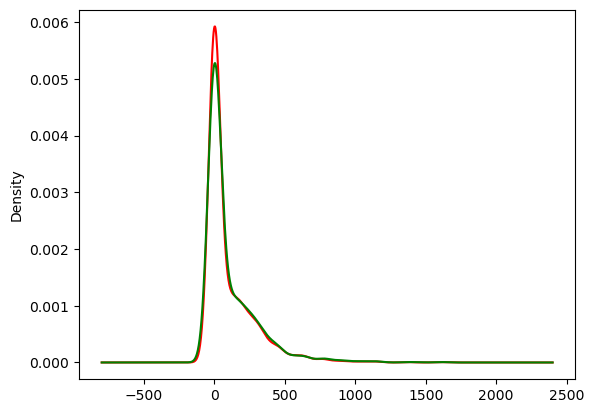

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['MasVnrArea'].plot.density(color='red')

# data after cca
new_df['MasVnrArea'].plot.density(color='green')

######## MasVnrArea is good to go

<AxesSubplot:ylabel='Density'>

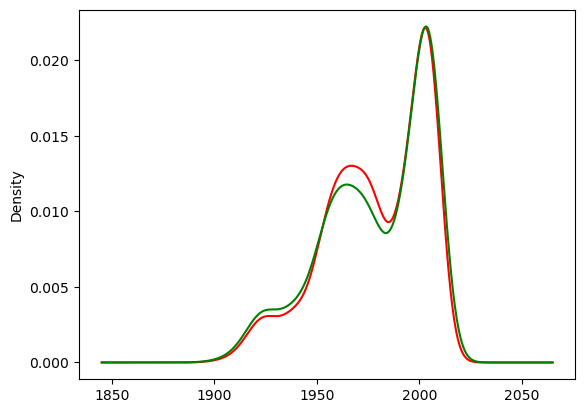

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GarageYrBlt'].plot.density(color='red')

# data after cca
new_df['GarageYrBlt'].plot.density(color='green')

####### GarageYrBlt has probelms

sns.pairplot(data=data)

sns.pairplot(data=new_df)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

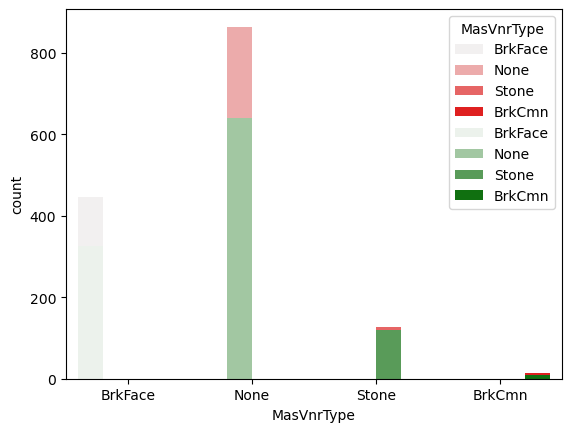

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.countplot(data=data,x='MasVnrType',color='red',hue='MasVnrType')

sns.countplot(data=new_df,x='MasVnrType',color='green',hue='MasVnrType')

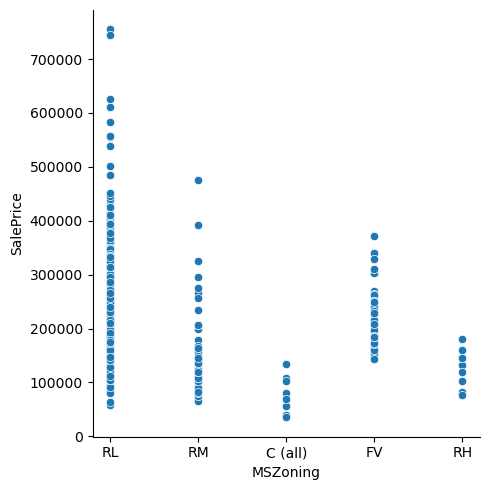

In [50]:
sns.relplot(data=new_df,x='MSZoning',y='SalePrice')

C:\Users\Asus\AppData\Local\Temp\ipykernel_16572\1724058539.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


<Figure size 800x800 with 0 Axes>

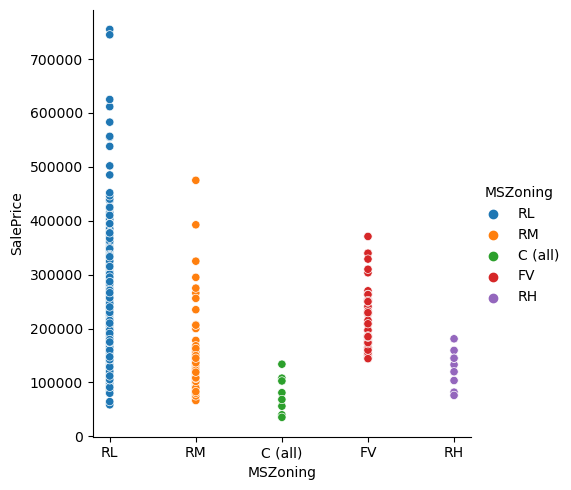

<Figure size 800x800 with 0 Axes>

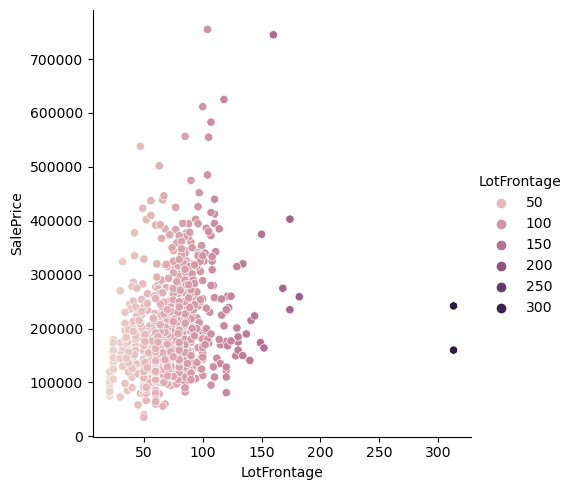

<Figure size 800x800 with 0 Axes>

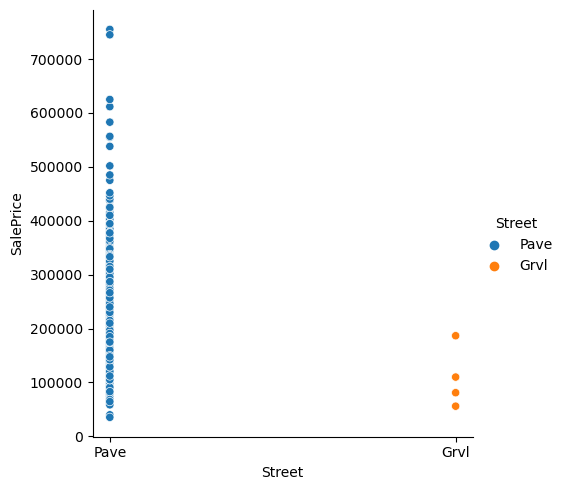

<Figure size 800x800 with 0 Axes>

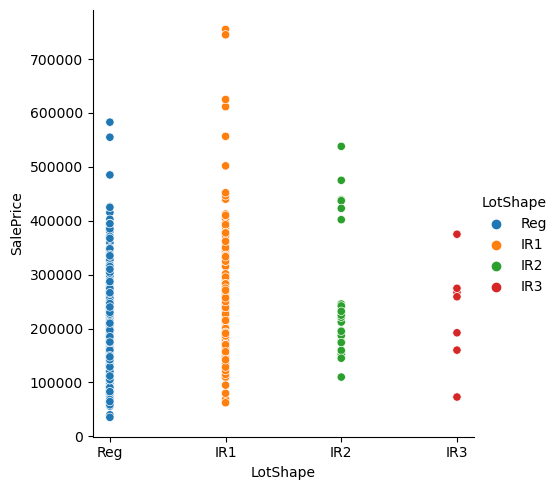

<Figure size 800x800 with 0 Axes>

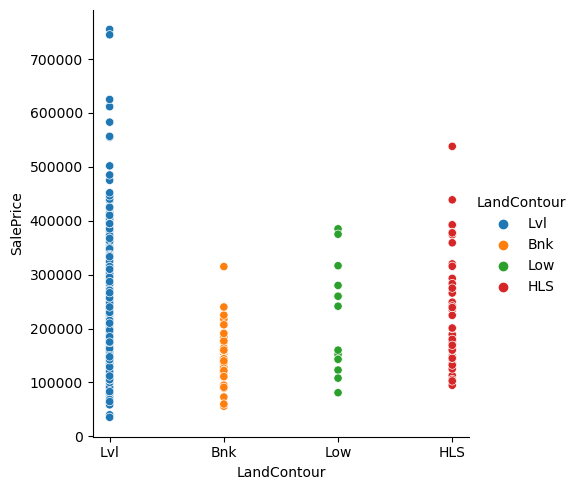

<Figure size 800x800 with 0 Axes>

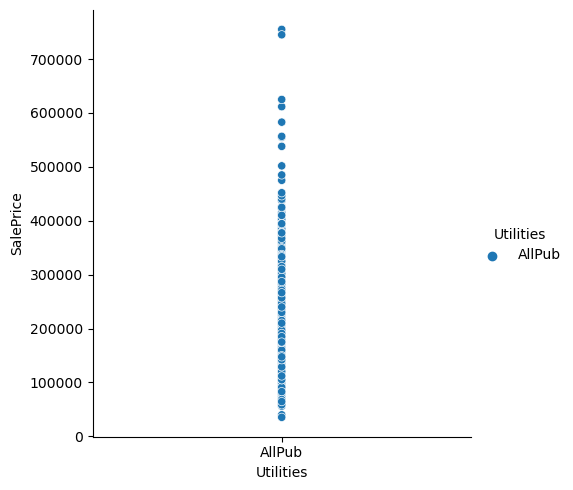

<Figure size 800x800 with 0 Axes>

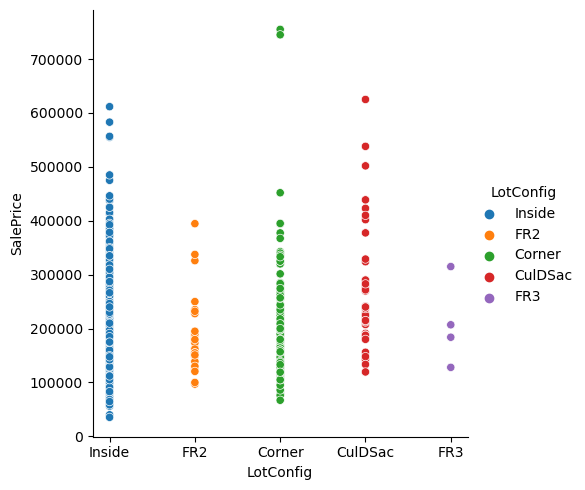

<Figure size 800x800 with 0 Axes>

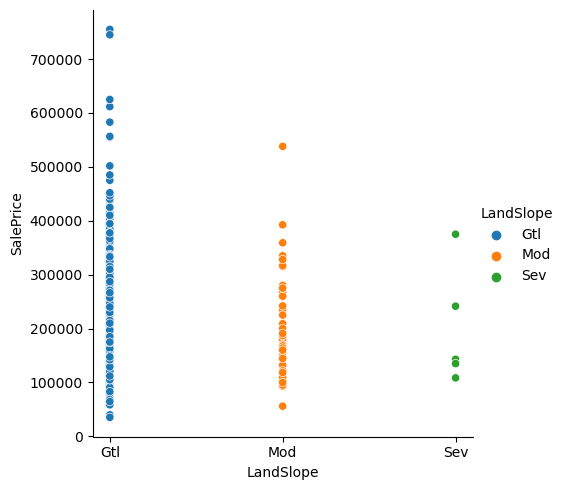

<Figure size 800x800 with 0 Axes>

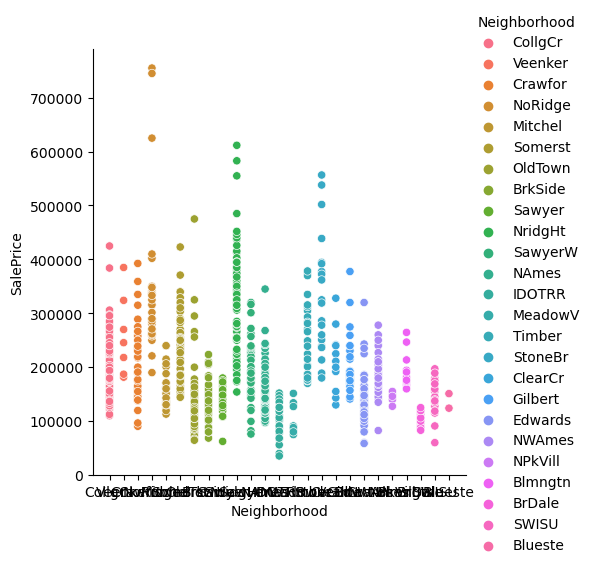

<Figure size 800x800 with 0 Axes>

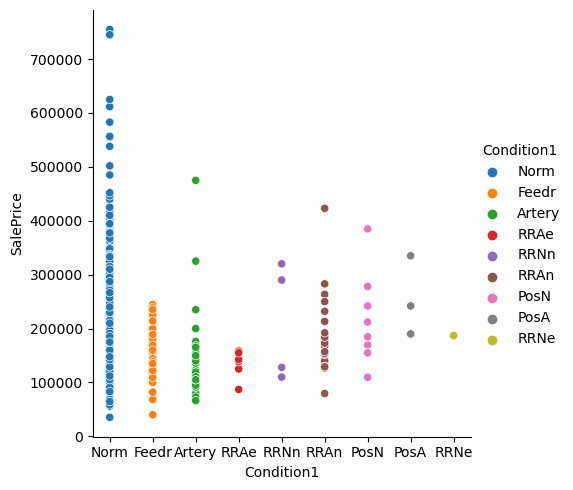

<Figure size 800x800 with 0 Axes>

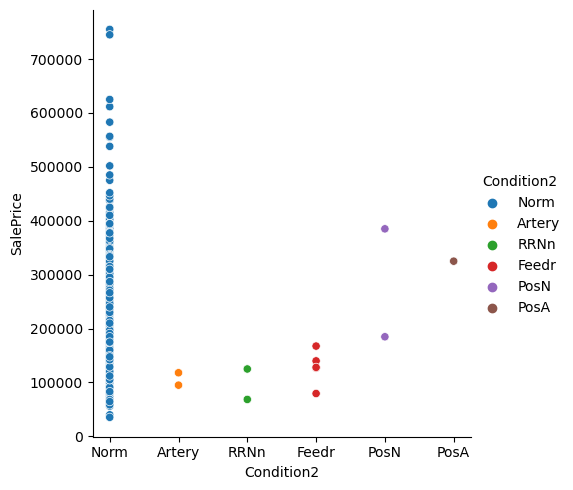

<Figure size 800x800 with 0 Axes>

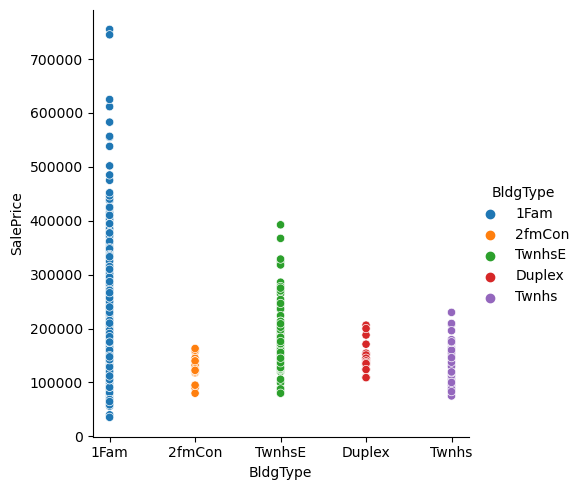

<Figure size 800x800 with 0 Axes>

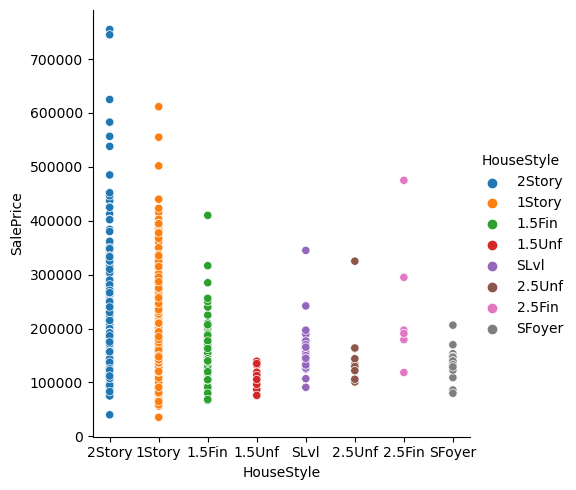

<Figure size 800x800 with 0 Axes>

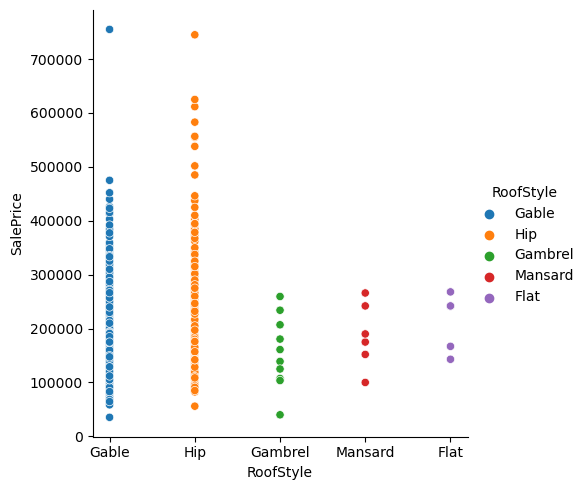

<Figure size 800x800 with 0 Axes>

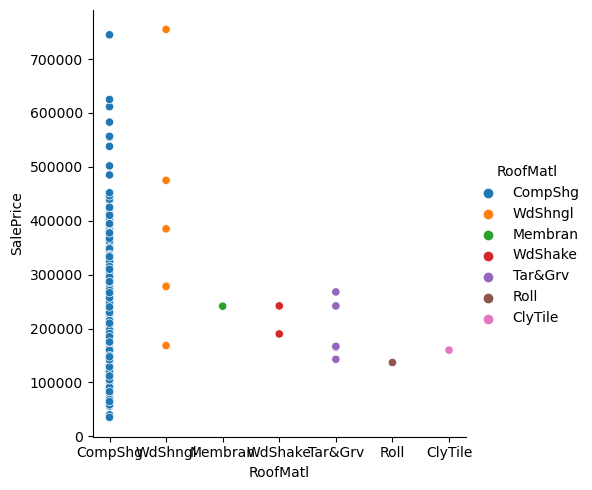

<Figure size 800x800 with 0 Axes>

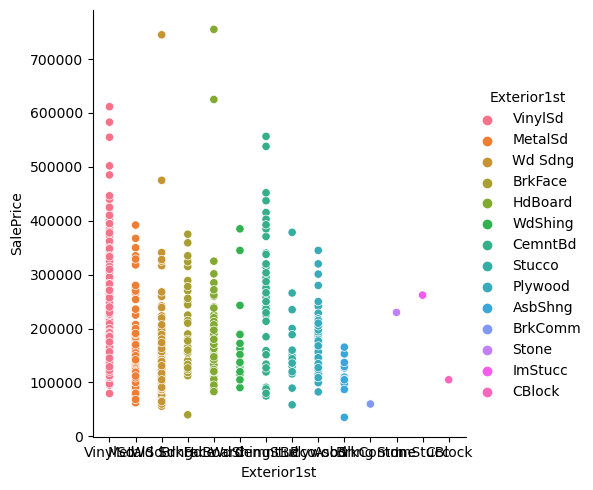

<Figure size 800x800 with 0 Axes>

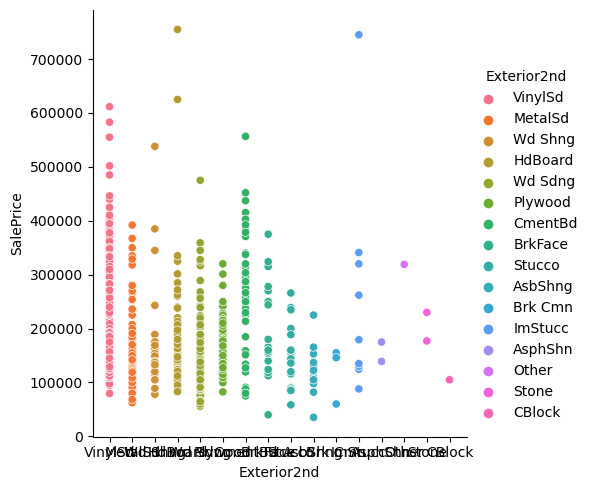

<Figure size 800x800 with 0 Axes>

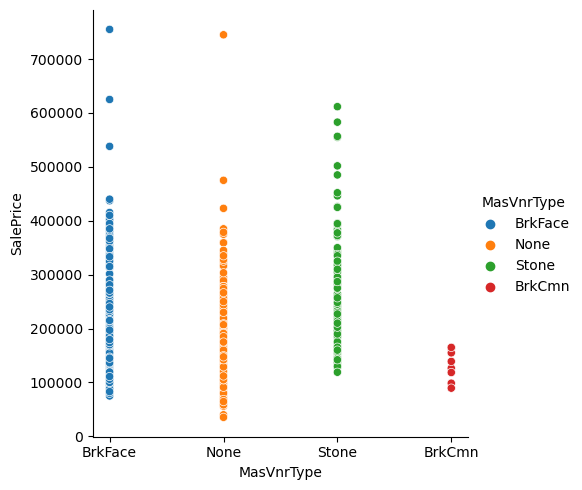

<Figure size 800x800 with 0 Axes>

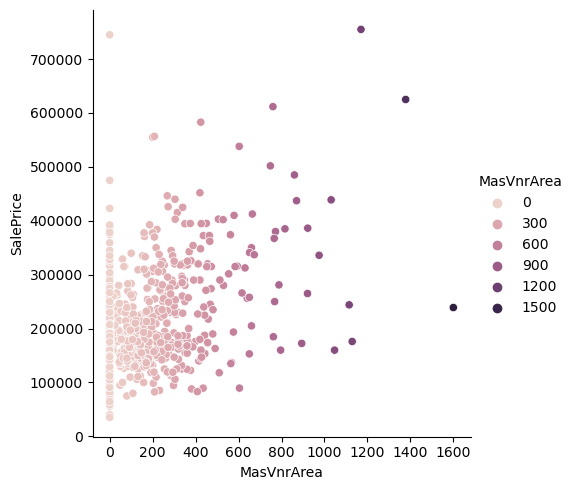

<Figure size 800x800 with 0 Axes>

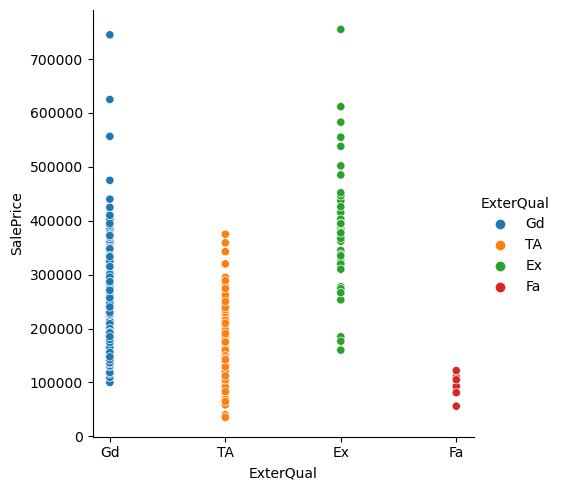

<Figure size 800x800 with 0 Axes>

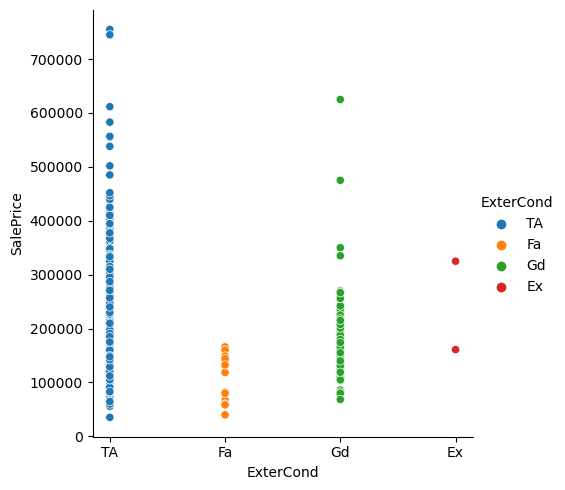

<Figure size 800x800 with 0 Axes>

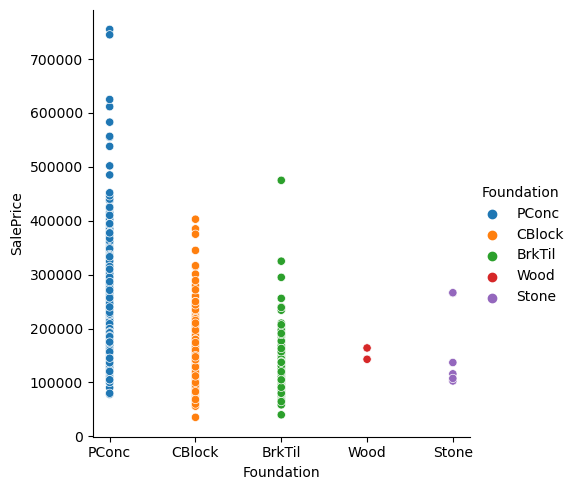

<Figure size 800x800 with 0 Axes>

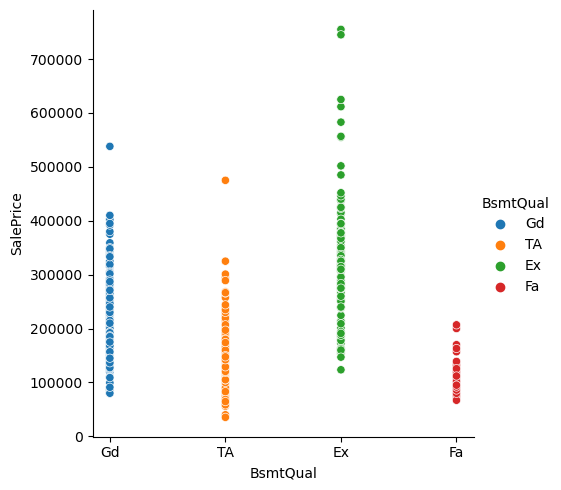

<Figure size 800x800 with 0 Axes>

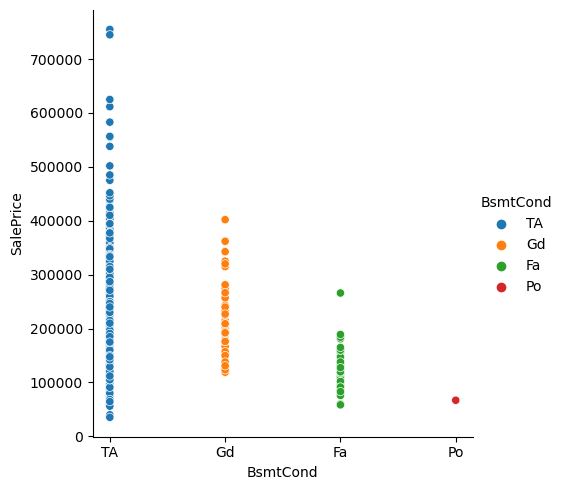

<Figure size 800x800 with 0 Axes>

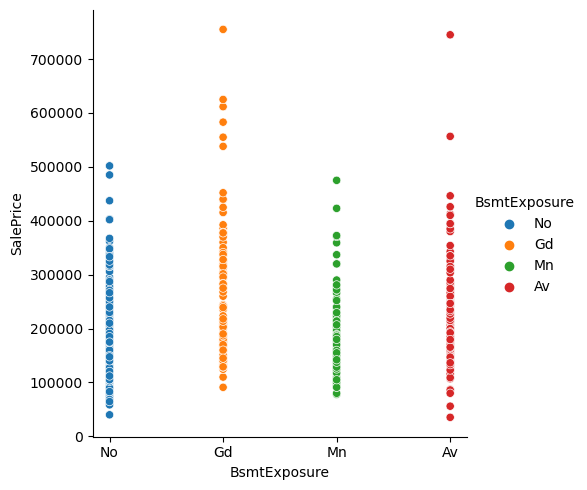

<Figure size 800x800 with 0 Axes>

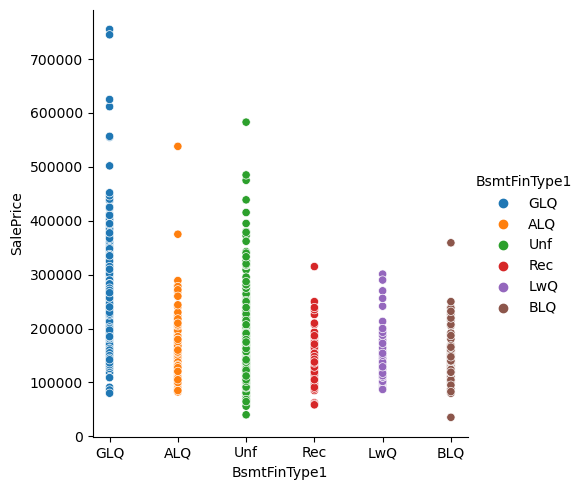

<Figure size 800x800 with 0 Axes>

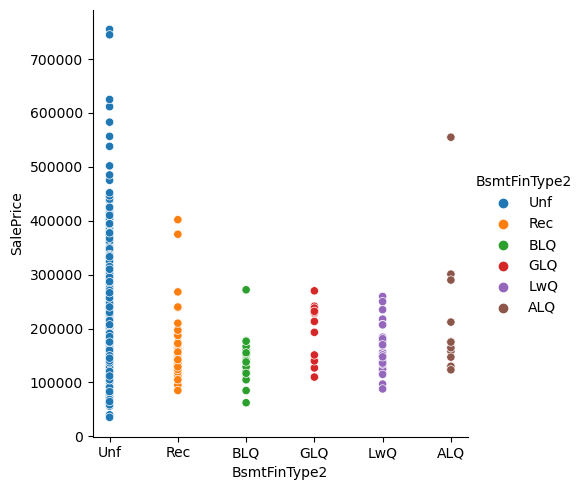

<Figure size 800x800 with 0 Axes>

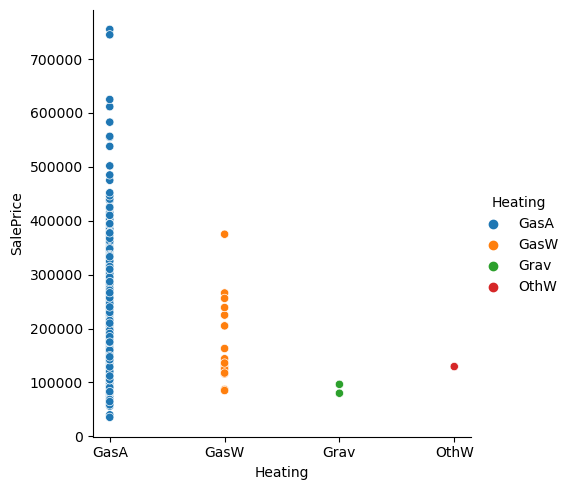

<Figure size 800x800 with 0 Axes>

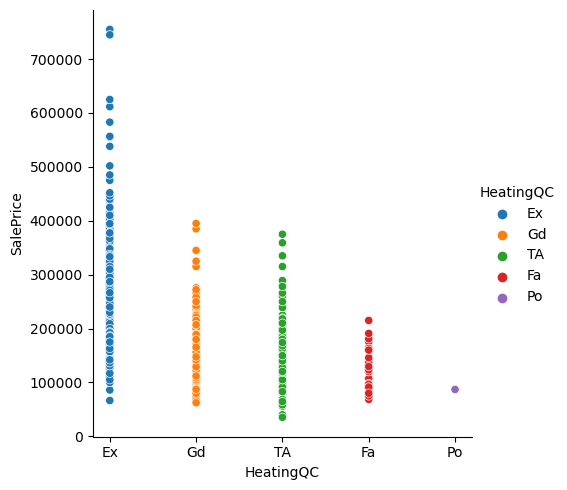

<Figure size 800x800 with 0 Axes>

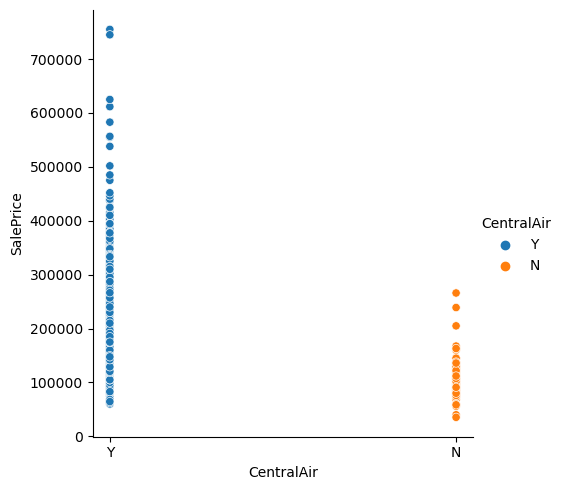

<Figure size 800x800 with 0 Axes>

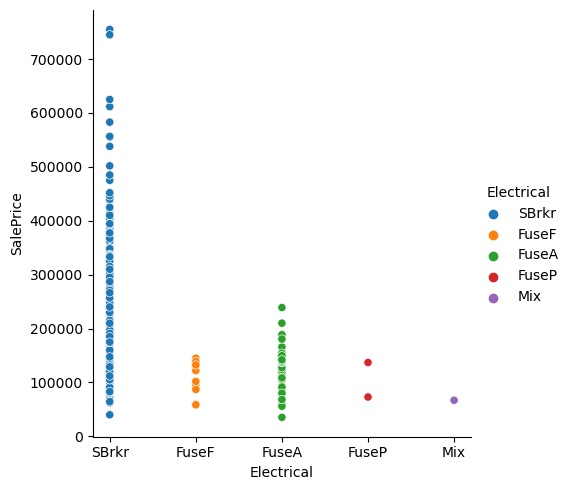

<Figure size 800x800 with 0 Axes>

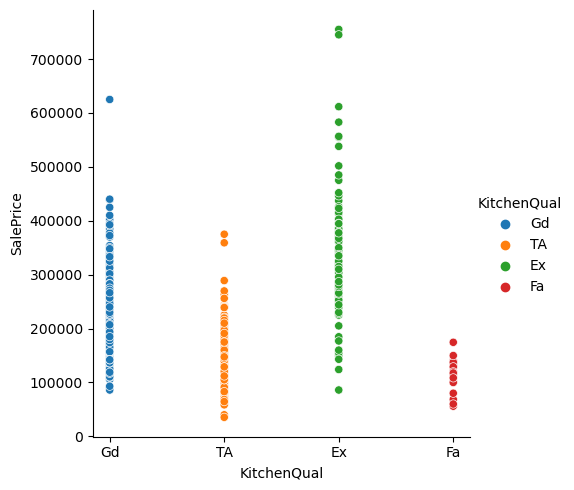

<Figure size 800x800 with 0 Axes>

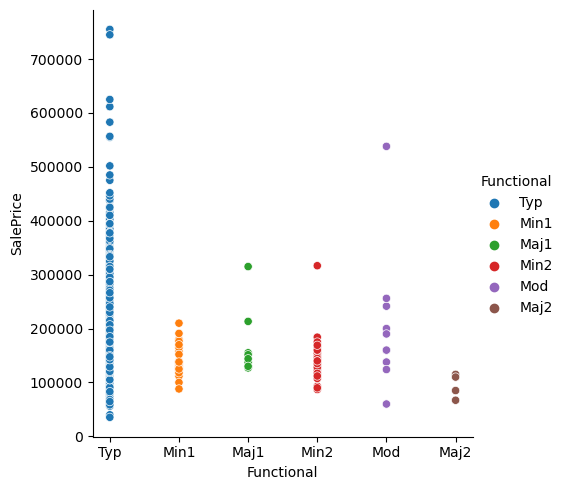

<Figure size 800x800 with 0 Axes>

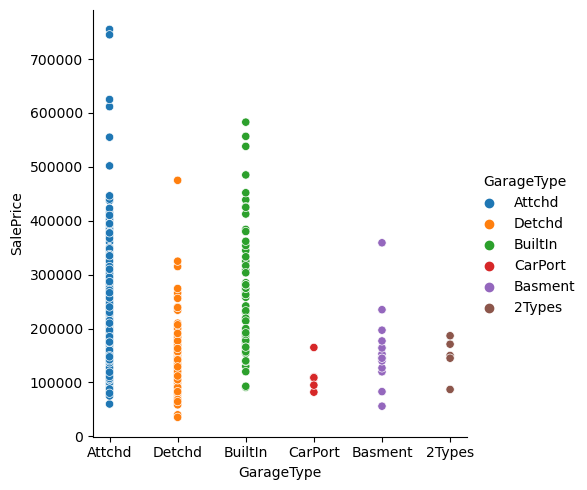

<Figure size 800x800 with 0 Axes>

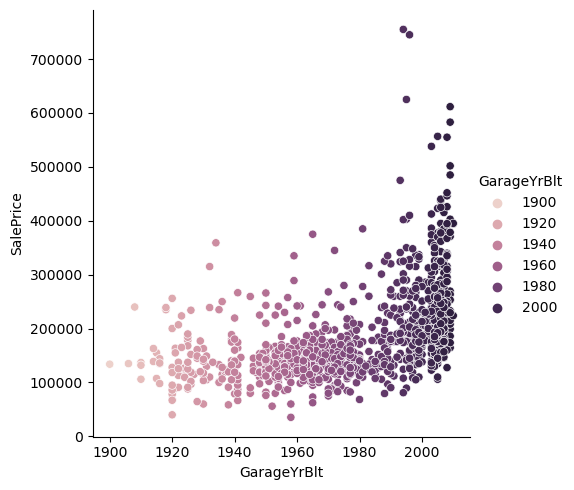

<Figure size 800x800 with 0 Axes>

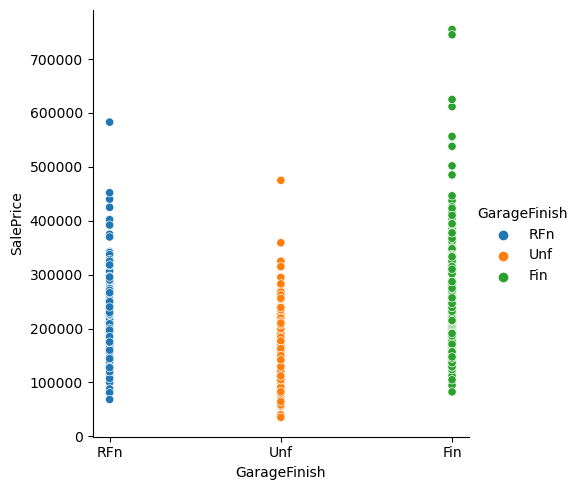

<Figure size 800x800 with 0 Axes>

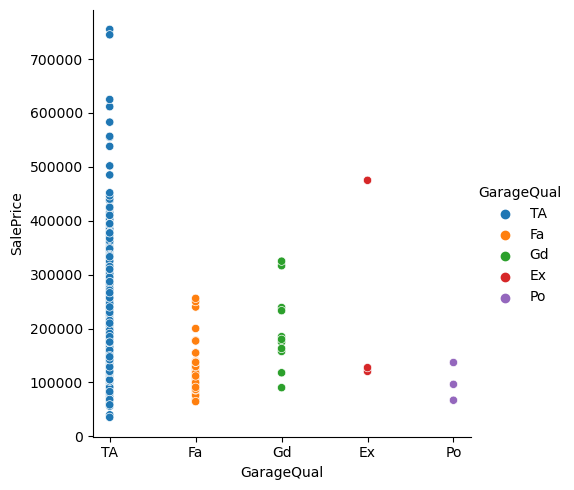

<Figure size 800x800 with 0 Axes>

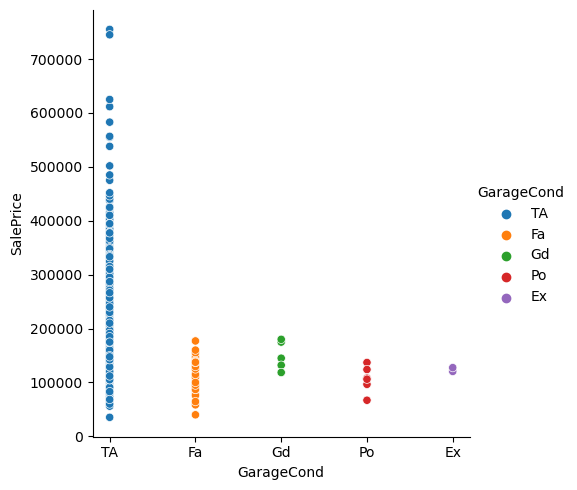

<Figure size 800x800 with 0 Axes>

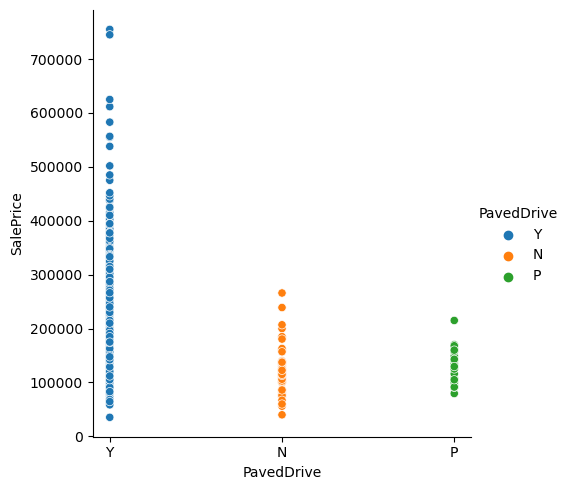

<Figure size 800x800 with 0 Axes>

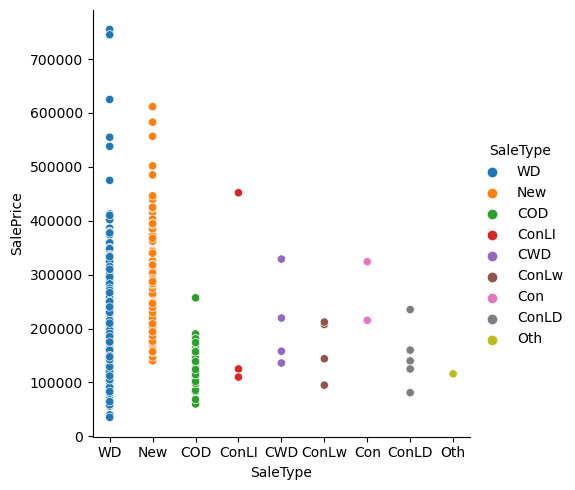

<Figure size 800x800 with 0 Axes>

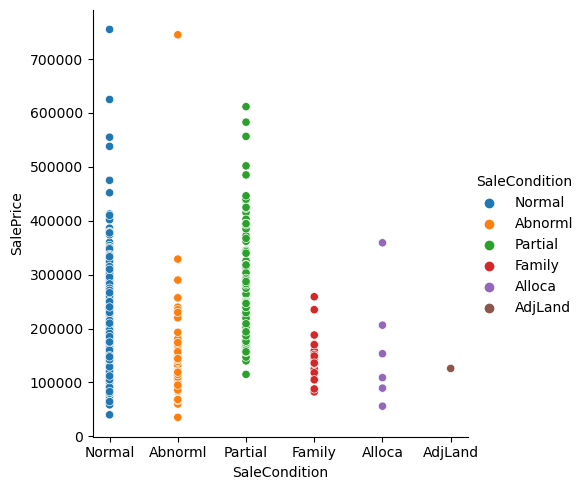

In [51]:
for i in categorical_col:
    plt.figure(figsize=(8,8))
    print(sns.relplot(data=new_df,x=new_df[i],y='SalePrice',hue=i))
    print()

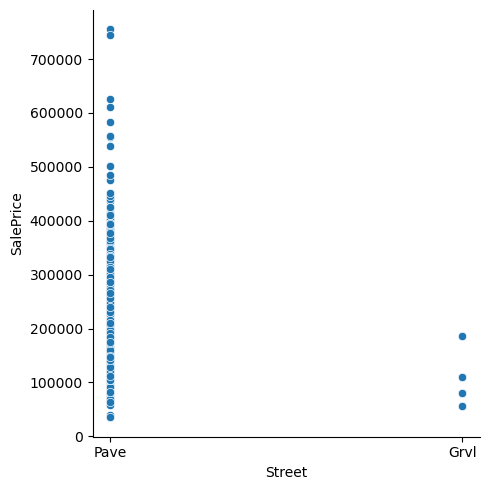

In [52]:
sns.relplot(data=new_df,x='Street',y='SalePrice')

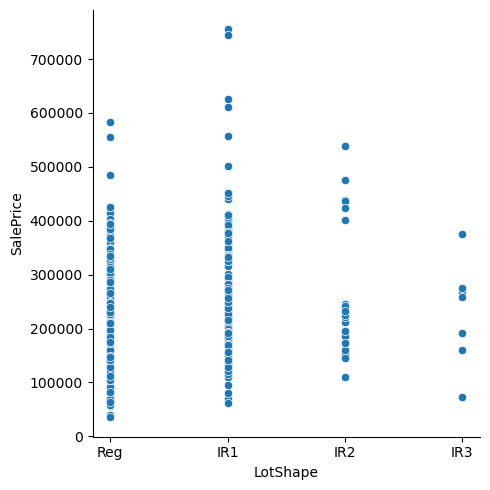

In [53]:
sns.relplot(data=new_df,x='LotShape',y='SalePrice')

### Correlation

In [54]:
corr_matrix = new_df.corr()
corr_matrix

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.015540    -0.014479 -0.042315    -0.058371   
MSSubClass     0.015540    1.000000    -0.389466 -0.197903     0.031639   
LotFrontage   -0.014479   -0.389466     1.000000  0.419714     0.241169   
LotArea       -0.042315   -0.197903     0.419714  1.000000     0.169876   
OverallQual   -0.058371    0.031639     0.241169  0.169876     1.000000   
OverallCond    0.008627   -0.085553    -0.047132 -0.033113    -0.189587   
YearBuilt     -0.022610    0.021605     0.107958  0.028954     0.590761   
YearRemodAdd  -0.030239    0.010178     0.082938  0.024308     0.568582   
MasVnrArea    -0.072344    0.040009     0.189769  0.106600     0.419756   
BsmtFinSF1    -0.013234   -0.069439     0.239734  0.232341     0.230438   
BsmtFinSF2     0.014964   -0.073834     0.046928  0.138615    -0.081342   
BsmtUnfSF     -0.014316   -0.147155     0.111368  0.008924     0.297384   
TotalBsmtSF   -0.024541   -0.264277     0.407566  0.324476     0.547448   
1stFlrSF      -0.007492   -0.258207     0.453035  0.331295     0.527908   
2ndFlrSF      -0.005997    0.319176     0.074953  0.075311     0.265906   
LowQualFinSF  -0.040553    0.024935     0.010748  0.019956    -0.011186   
GrLivArea     -0.013772    0.078213     0.397260  0.308590     0.610102   
BsmtFullBath   0.027265   -0.013040     0.115151  0.179874     0.107138   
BsmtHalfBath  -0.027415    0.012509    -0.000491 -0.014597    -0.060775   
FullBath       0.003601    0.119495     0.189692  0.132860     0.597881   
HalfBath      -0.015403    0.206259     0.043414  0.043977     0.239893   
BedroomAbvGr   0.039320   -0.044628     0.277136  0.141428     0.091462   
KitchenAbvGr   0.013252    0.258401     0.007411 -0.010855    -0.141071   
TotRmsAbvGrd   0.013832    0.038180     0.354714  0.241849     0.465733   
Fireplaces    -0.015798   -0.029575     0.260293  0.255842     0.409725   
GarageYrBlt   -0.003820    0.051225     0.067254  0.012871     0.562405   
GarageCars    -0.009568   -0.031638     0.285748  0.173525     0.605466   
GarageArea    -0.023290   -0.095374     0.357030  0.213104     0.555315   
WoodDeckSF    -0.027597   -0.018514     0.081338  0.133995     0.273652   
OpenPorchSF   -0.000987    0.006799     0.160862  0.098051     0.335884   
EnclosedPorch  0.011796   -0.019313     0.016058 -0.022789    -0.155080   
3SsnPorch     -0.061688   -0.035855     0.073004  0.013343     0.020081   
ScreenPorch    0.015019   -0.021854     0.034937  0.072413     0.049286   
PoolArea       0.048487    0.003221     0.211959  0.109294     0.080037   
MiscVal        0.050954   -0.043299     0.000789  0.012483    -0.062944   
MoSold         0.007486   -0.025393     0.014951  0.006270     0.082995   
YrSold         0.005307   -0.012347     0.013366 -0.006412    -0.003529   
SalePrice     -0.047595   -0.089478     0.343978  0.302268     0.795437   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.008627  -0.022610     -0.030239   -0.072344   -0.013234   
MSSubClass       -0.085553   0.021605      0.010178    0.040009   -0.069439   
LotFrontage      -0.047132   0.107958      0.082938    0.189769    0.239734   
LotArea          -0.033113   0.028954      0.024308    0.106600    0.232341   
OverallQual      -0.189587   0.590761      0.568582    0.419756    0.230438   
OverallCond       1.000000  -0.437647      0.024427   -0.174581   -0.068285   
YearBuilt        -0.437647   1.000000      0.625905    0.328897    0.234207   
YearRemodAdd      0.024427   0.625905      1.000000    0.187492    0.111675   
MasVnrArea       -0.174581   0.328897      0.187492    1.000000    0.281356   
BsmtFinSF1       -0.068285   0.234207      0.111675    0.281356    1.000000   
BsmtFinSF2        0.040598  -0.058987     -0.063813   -0.080799   -0.046328   
BsmtUnfSF        -0.169743   0.170077      0.187505    0.100304   -0.550064   
TotalBsmtSF      -0.243419   0.423763      0.302488    0.393759    0

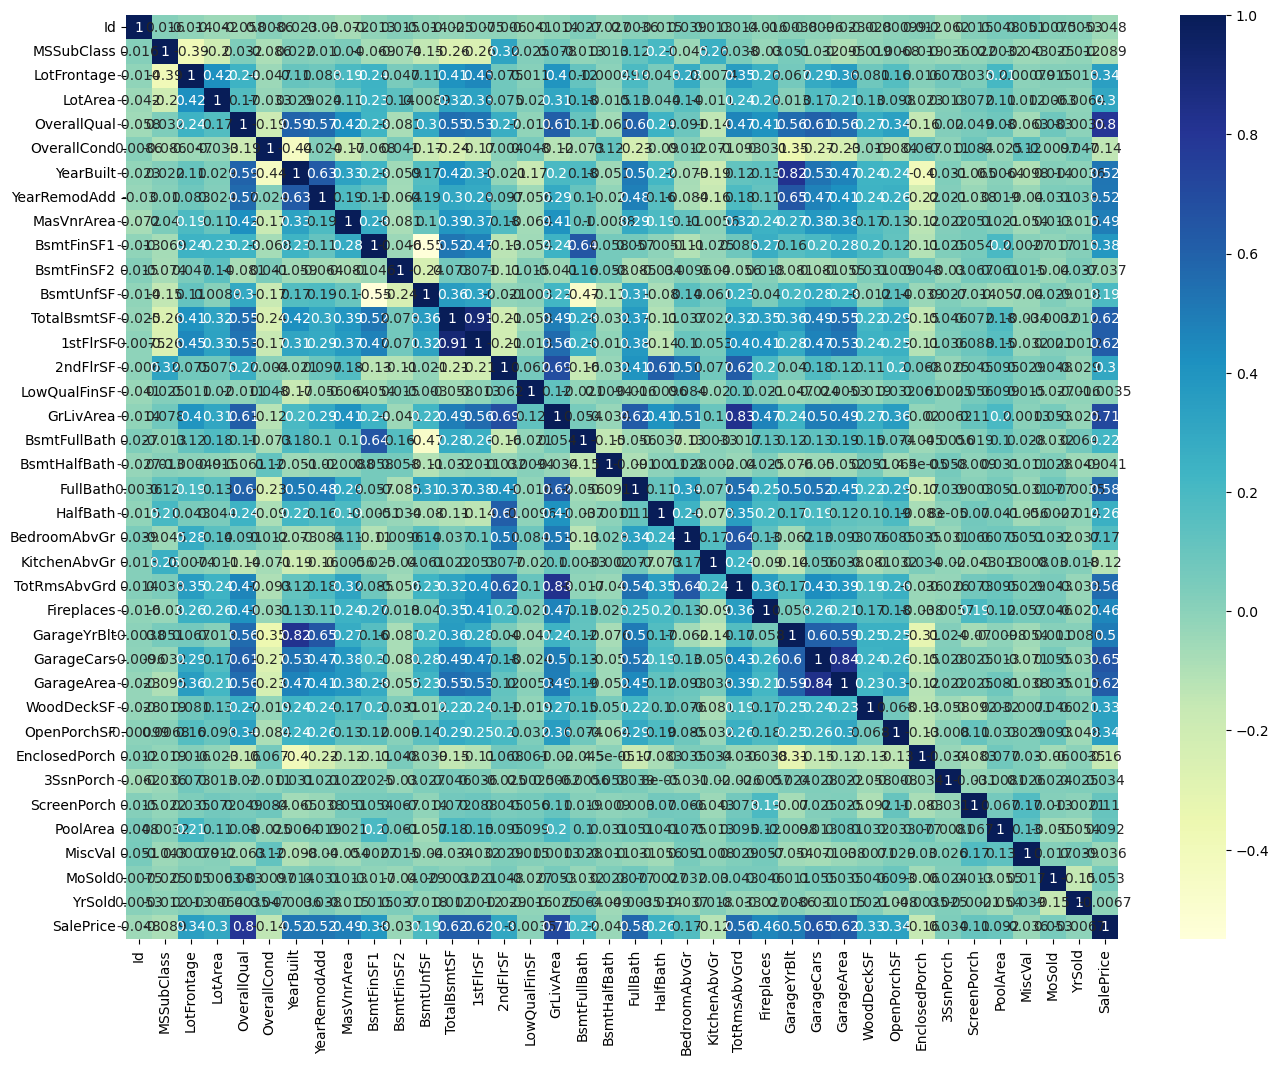

In [55]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True)
plt.show()

### Splitting data

In [56]:
new_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [57]:
new_df.shape

(1094, 76)

In [58]:
X_train = new_df.iloc[:,:-1]
y_train = new_df.iloc[:,-1]

X_train.shape, y_train.shape

((1094, 75), (1094,))

In [59]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [60]:
ohe = OneHotEncoder(sparse = False, drop ='first',handle_unknown = "ignore")

In [61]:
col_trans = ColumnTransformer(transformers=[
    ("tnf1",ohe,['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                                                          'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                                          'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                                         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])],remainder='passthrough')

In [62]:
X_train_trf = col_trans.fit_transform(X_train)
X_train_trf

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [63]:
X_train_trf.shape

(1094, 222)

In [64]:
X_test = pd.merge(X_test,y_test,on='Id')
X_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          TA             5        Typ           0     Attchd   
1             1          Gd             6        Typ           0     Attchd   
2             1          TA             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     

In [65]:
X_test.shape

(1459, 76)

In [66]:
X_test.isna().sum().sort_values(ascending=False)

LotFrontage     227
GarageFinish     78
GarageYrBlt      78
GarageQual       78
GarageCond       78
               ... 
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
SalePrice         0
Length: 76, dtype: int64

In [67]:
X_test = X_test.dropna(axis='rows')
X_test.shape

(1108, 76)

In [68]:
y_test = X_test.iloc[:,-1]

In [69]:
X_test = X_test.iloc[:,:-1]

In [70]:
X_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1451  2912          20       RL         80.0    13384   Pave      Reg   
1452  2913         160       RM         21.0     1533   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1451         Lvl    AllPub    Inside       Mod      Mitchel       Norm   
1452         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1451       Norm     1Fam     1Story            5            5       1969   
1452       Norm    Twnhs     2Story            4            5       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1451          1979     Gable  CompShg     Plywood     Plywood    BrkFace   
1452          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   
4            0.0        Gd        TA      PConc       Gd       TA   
..

In [71]:
y_test.shape

(1108,)

In [72]:
y_test.values

array([169277.0524984 , 187758.39398877, 183583.68356955, ...,
       164788.77823114, 219222.42340006, 187741.86665748])

In [73]:
y_test.shape, X_test.shape

((1108,), (1108, 75))

In [74]:
X_test_trf = col_trans.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [12, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [75]:
X_test.iloc[:,12:]

Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0         Feedr       Norm     1Fam     1Story            5            6   
1          Norm       Norm     1Fam     1Story            6            6   
2          Norm       Norm     1Fam     2Story            5            5   
3          Norm       Norm     1Fam     2Story            6            6   
4          Norm       Norm   TwnhsE     1Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1451       Norm       Norm     1Fam     1Story            5            5   
1452       Norm       Norm    Twnhs     2Story            4            5   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          1961          1961     Gable  CompShg     VinylSd     VinylSd   
1          1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2          1997          1998     Gable  CompShg     VinylSd     VinylSd   
3          1998          1998     Gable  CompShg     VinylSd     VinylSd   
4          1992          1992     Gable  CompShg     HdBoard     HdBoard   
...         ...           ...       ...      ...         ...         ...   
1451       1969          1979     Gable  CompShg     Plywood     Plywood   
1452       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None         0.0        TA        TA     CBlock       TA       TA   
1       BrkFace       108.0        TA        TA     CBlock       TA       TA   
2          None         0.0        TA        TA      PConc       Gd       TA   
3       BrkFace        20.0        TA        TA      PConc       TA       TA   
4          None         0.0        Gd        TA      PConc       Gd       TA   
...         ...         ...       ...       ...        ...      ...      ...   
1451    BrkFace       194.0        TA        TA      PConc       TA       TA   
1452       None         0.0        TA        TA     CBlock       TA       TA   
1455       None         0.0        TA        TA     CBlock       TA       TA   
1456       None         0.0        TA        TA     CBlock       TA       TA   
1458    BrkFace        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          Rec       468.0          LwQ       144.0   
1              No          ALQ       923.0          Unf         0.0   
2              No          GLQ       791.0          Unf         0.0   
3              No          GLQ       602.0          Unf         0.0   
4              No          ALQ       263.0          Unf         0.0   
...           ...          ...         ...          ...         ...   
1451           Av          Rec       119.0          BLQ       344.0   
1452           No          Rec       408.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0         270.0        882.0    GasA        TA          Y      SBrkr   
1         406.0       1329.0    GasA        TA          Y      SBrkr   
2         137.0        928.0    GasA        Gd          Y      SBrkr   
3         324.0        926.0    GasA        Ex          Y      SBrkr   
4    

In [76]:
X_test_trf

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.250e+04, 6.000e+00,
        2.010e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 4.000e+00,
        2.006e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.100e+01,
        2.006e+03]])

In [77]:
X_test_trf.shape

(1108, 222)

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [79]:
rf = RandomForestRegressor(n_jobs=-1)

In [80]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
rf.fit(X_train_trf,y_train)

RandomForestRegressor(n_jobs=-1)

In [82]:
y_pred = rf.predict(X_test_trf)
y_pred

array([122161.09, 148255.  , 186852.92, ...,  88072.5 , 152526.74,
       227478.22])

In [83]:
rf.score(X_test_trf,y_test)

-20.96605267895459

In [84]:
r2_score(y_test,y_pred)

-20.96605267895459

### Cross val

In [85]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [86]:
kf = KFold(n_splits=10)

In [87]:
np.mean(cross_val_score(rf,X_train_trf,y_train,cv=kf))

0.8533710430233912

### Hyper Parameter Tuning

In [88]:
criterion = ["squared_error"]
n_estimators = [100]
max_depth=[300,350]
max_features = ["auto"]
min_samples_split = [5]
min_samples_leaf = [5]
max_samples = [500,550,600]

In [89]:
param_grid = {'criterion':criterion,
              'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf              
             }

In [90]:
rf_grid = GridSearchCV(estimator = rf,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs= -1)

In [91]:
import time

In [92]:
start = time.time()

rf_grid.fit(X_train_trf,y_train)

stop = time.time()
print(f"Training time: {stop - start} seconds")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time: 16.941869020462036 seconds


In [93]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=300, max_samples=600, min_samples_leaf=5,
                      min_samples_split=5, n_jobs=-1)

In [94]:
rf_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 300,
 'max_features': 'auto',
 'max_samples': 600,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [95]:
rf_grid.best_score_

0.8386401542629585

In [96]:
rf = RandomForestRegressor(criterion='squared_error',
                           max_depth=300,
                           max_features="auto",
                           max_samples=500,
                           min_samples_leaf=5,
                           min_samples_split= 5,
                           n_estimators=100,
                           n_jobs=-1)

In [97]:
rf.fit(X_train_trf,y_train)

RandomForestRegressor(max_depth=300, max_samples=500, min_samples_leaf=5,
                      min_samples_split=5, n_jobs=-1)

In [99]:
rf.score(X_train_trf,y_train)

0.891720526051446

In [98]:
rf.score(X_test_trf,y_test)

-19.999843741470126

### replacing rest null values with 0

In [146]:
X_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
..

In [148]:
data['Functional'].unique()[::-1]

array(['Sev', 'Maj2', 'Mod', 'Min2', 'Maj1', 'Min1', 'Typ'], dtype=object)

In [150]:
list1= ['Typ',
'Min1',
'Min2',
'Mod',
'Maj1',
'Maj2',
'Sev',
'Sal']

In [151]:
list1[::-1]

['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

In [152]:
['1Story'
'1.5Fin',
'1.5Unf',
'2Story',
'2.5Fin',
'2.5Unf',
'SFoyer',
'SLvl'][::-1]

['SLvl', 'SFoyer', '2.5Unf', '2.5Fin', '2Story', '1.5Unf', '1Story1.5Fin']